#### Import Modules

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import RobustScaler
from pandas.plotting import register_matplotlib_converters

import matplotlib.pyplot as plt
from IPython.display import Image
from pylab import rcParams
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper
from sklearn.ensemble import GradientBoostingRegressor

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
# To filter warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor

#split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper
from vecstack import stacking


#### Import File

In [7]:
df = pd.read_csv("Dataset.csv")

In [9]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
df.shape

(7385, 12)

In [15]:
def understand_data(data) :
    return(pd.DataFrame({"Datatype":data.dtypes,
                         "No of NAs":data.isna().sum(),
                         "No of Levels":data.apply(lambda x: x.nunique(),axis=0),
                         "Levels":data.apply(lambda x: str(x.unique()),axis=0)}))


In [17]:
understand_data(df)

,Datatype,No of NAs,No of Levels,Levels
Make,object,0,42,['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'B...
Model,object,0,2053,['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD ...
Vehicle Class,object,0,16,['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATE...
Engine Size(L),float64,0,51,[2. 2.4 1.5 3.5 3.7 1.8 5.9 4.7 3. 4. 6.3 4...
Cylinders,int64,0,8,[ 4 6 12 8 10 3 5 16]
Transmission,object,0,27,['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8'...
Fuel Type,object,0,5,['Z' 'D' 'X' 'E' 'N']
Fuel Consumption City (L/100 km),float64,0,211,[ 9.9 11.2 6. 12.7 12.1 11.9 11.8 12.8 13.4 ...
Fuel Consumption Hwy (L/100 km),float64,0,143,[ 6.7 7.7 5.8 9.1 8.7 8.1 9. 9.5 7.5 ...
Fuel Consumption Comb (L/100 km),float64,0,181,[ 8.5 9.6 5.9 11.1 10.6 10. 10.1 11.6 9.2 ...


In [19]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

#### Change Data type Object to Category for better understnad

In [22]:
cat_col = ['Make', 'Model', 'Vehicle Class','Transmission', 'Fuel Type']

In [24]:
df[cat_col] = df[cat_col].astype("category")

In [28]:
understand_data(df)

,Datatype,No of NAs,No of Levels,Levels
Make,category,0,42,"['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI'..."
Model,category,0,2053,"['ILX', 'ILX HYBRID', 'MDX 4WD', 'RDX AWD', 'R..."
Vehicle Class,category,0,16,"['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SE..."
Engine Size(L),float64,0,51,[2. 2.4 1.5 3.5 3.7 1.8 5.9 4.7 3. 4. 6.3 4...
Cylinders,int64,0,8,[ 4 6 12 8 10 3 5 16]
Transmission,category,0,27,"['AS5', 'M6', 'AV7', 'AS6', 'AM6', ..., 'AM8',..."
Fuel Type,category,0,5,"['Z', 'D', 'X', 'E', 'N']\nCategories (5, obje..."
Fuel Consumption City (L/100 km),float64,0,211,[ 9.9 11.2 6. 12.7 12.1 11.9 11.8 12.8 13.4 ...
Fuel Consumption Hwy (L/100 km),float64,0,143,[ 6.7 7.7 5.8 9.1 8.7 8.1 9. 9.5 7.5 ...
Fuel Consumption Comb (L/100 km),float64,0,181,[ 8.5 9.6 5.9 11.1 10.6 10. 10.1 11.6 9.2 ...


In [26]:
df.duplicated().sum()

1103

In [30]:
df.drop_duplicates(inplace=True)

In [32]:
df.shape

(6282, 12)

#### Rename the Columns

In [35]:
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'
                    }, inplace=True)

In [42]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

#### Data Visualisation

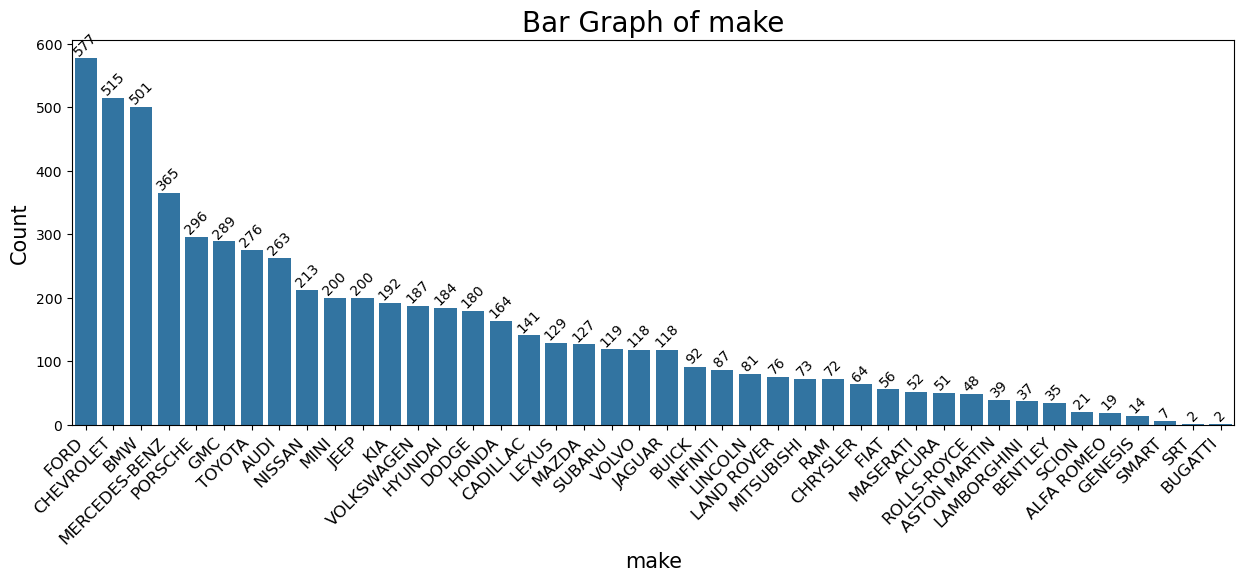

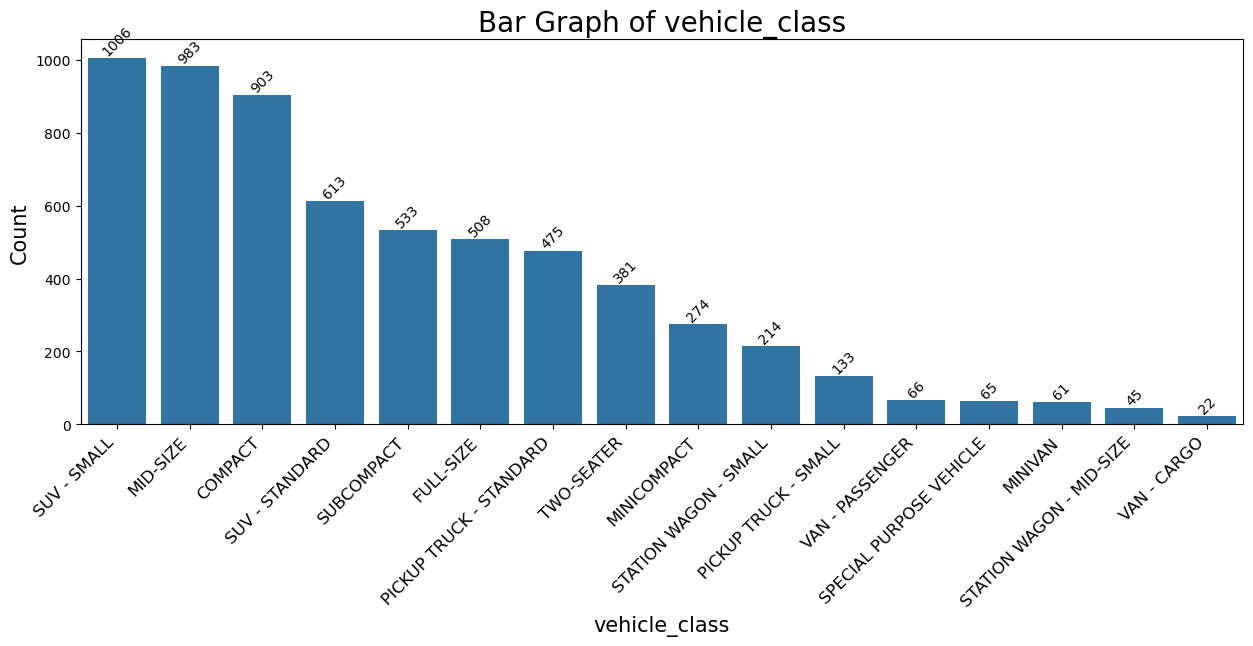

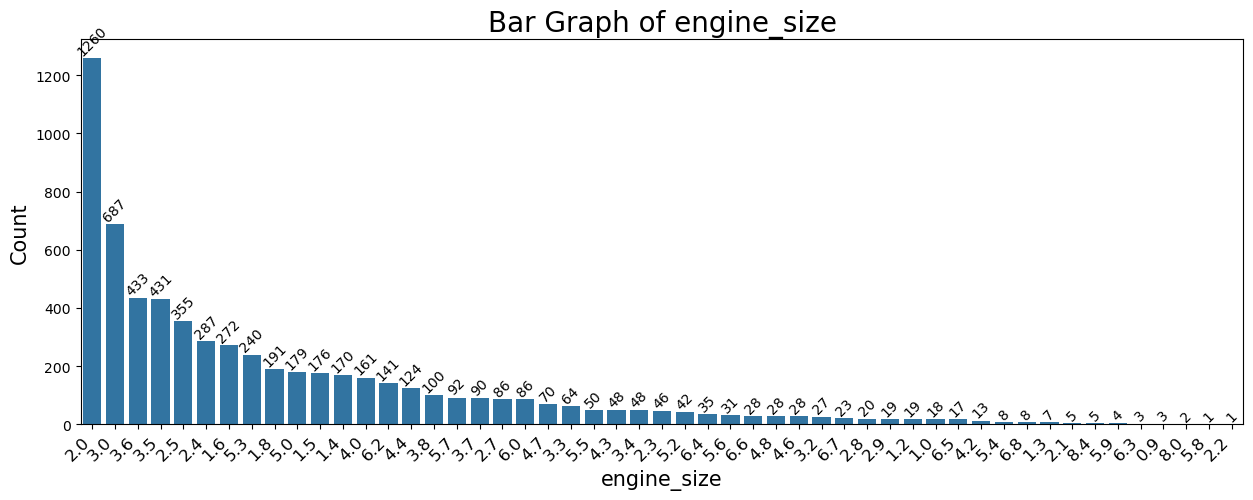

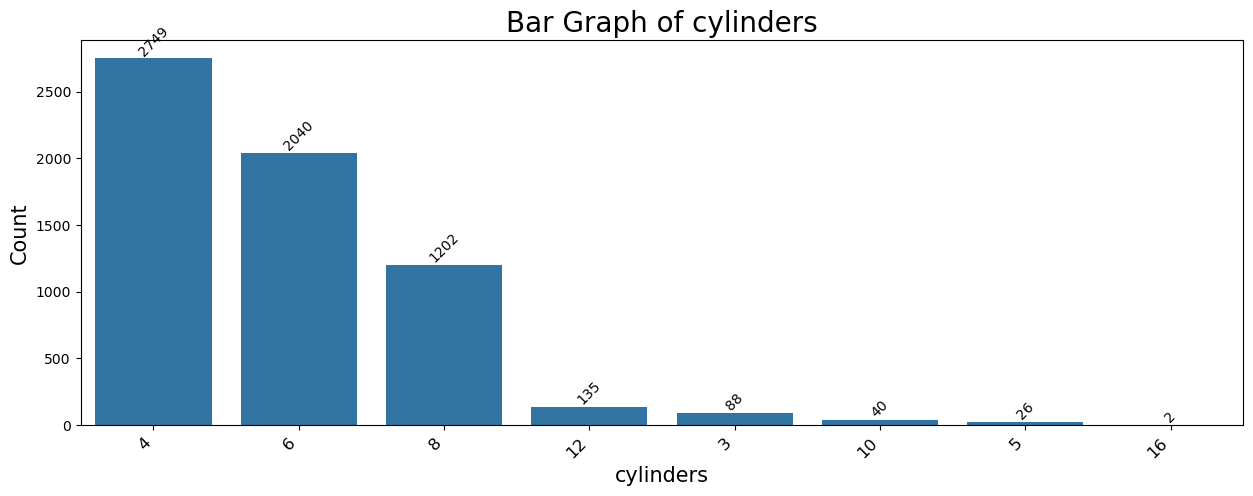

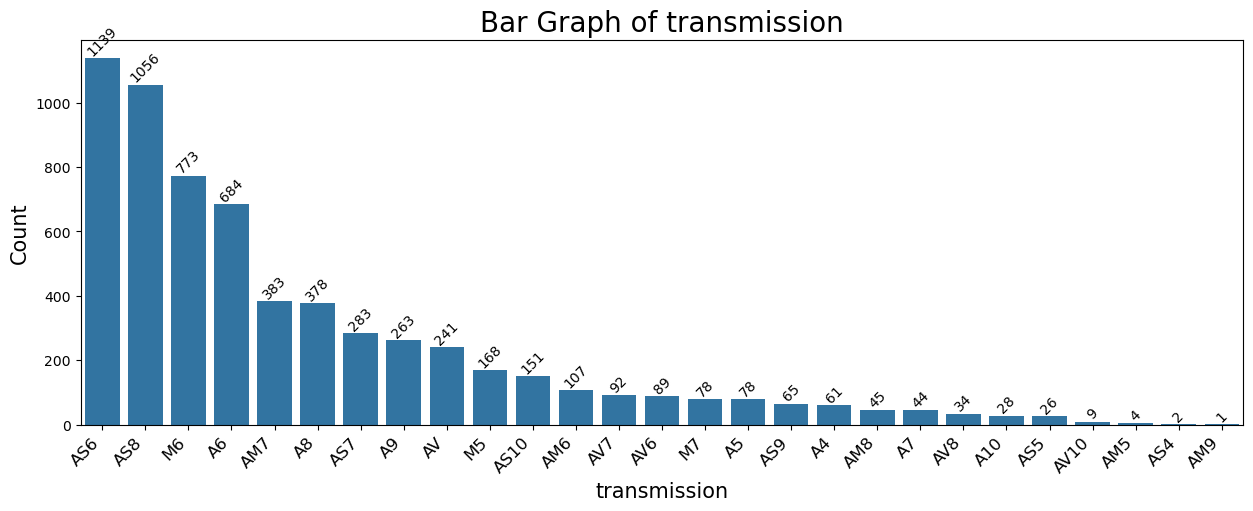

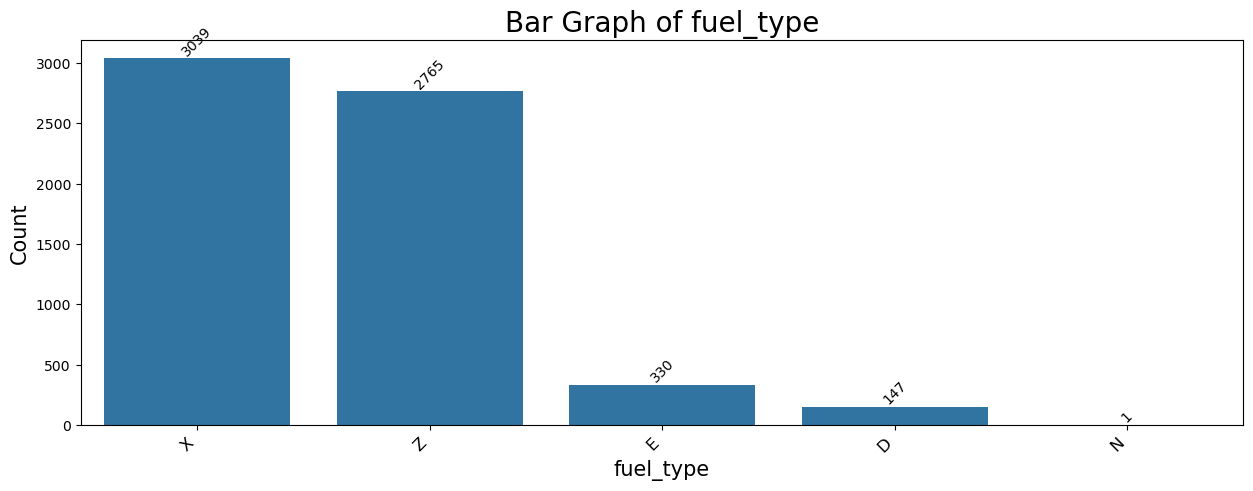

In [44]:
# Distribution of our categorical characteristics

def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Bar Graph of {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
cat_features = ['make','vehicle_class', 'engine_size', 'cylinders', 'transmission', 'fuel_type']

plot_bar_graphs(df, cat_features)

In [47]:
df.model.unique()


['ILX', 'ILX HYBRID', 'MDX 4WD', 'RDX AWD', 'RLX', ..., 'Highlander Hybrid AWD Limited/Platinum', 'RAV4 AWD TRD Off-Road', 'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION', 'XC40 T4 AWD']
Length: 2053
Categories (2053, object): ['124 SPIDER', '124 Spider', '1500', '1500 (MDS)', ..., 'iQ', 'tC', 'xB', 'xD']

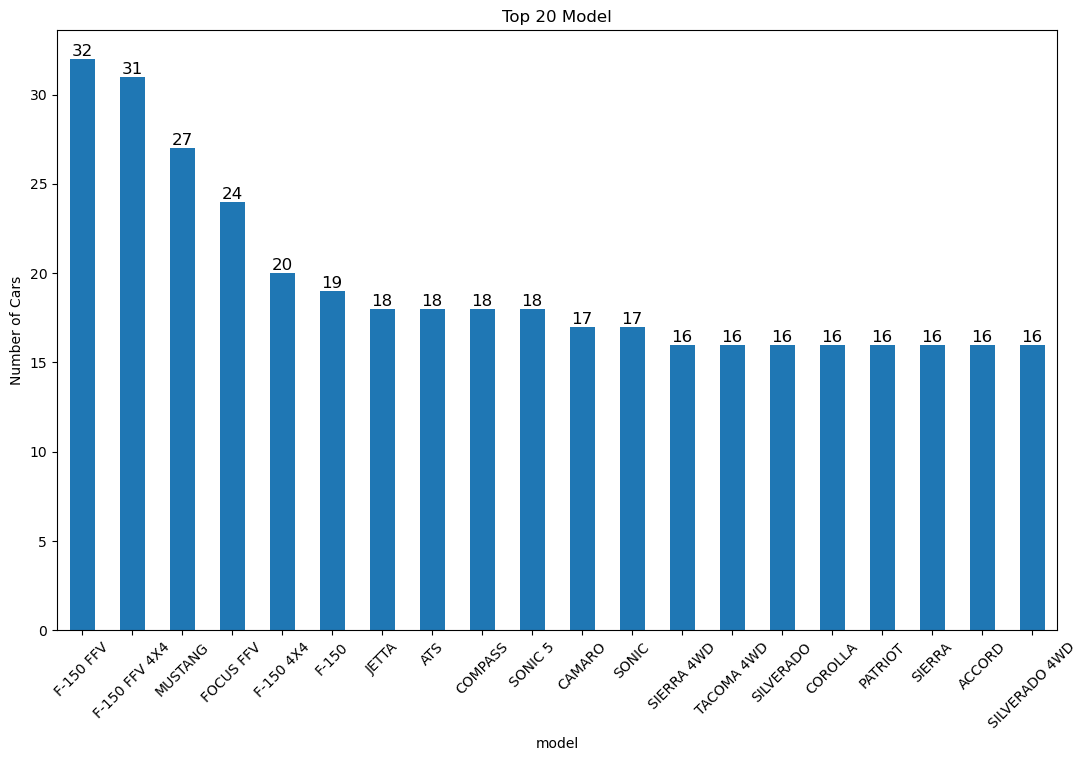

In [49]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.model.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Top 20 Model')   
plt.xlabel('model') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [ ]:
# Observations from the graphs above:

1. The number of vehicles using diesel, ethanol, & natural gas fuel is very small.(Bar graph of fuel_type)
2. AS6, AS8, M6, A6, and A9 are the most common transmission options.(Bar graph of transmission)
3. Vehicles commonly have 4, 6, or 8 cylinders. (Bar graph of Cylinder)
4. Engine sizes of 2.0 and 3.0 liters are most common. (Bar graph of engine_size)
5. The dataset mainly consists of smaller vehicles.

#### relationship between categorical attributes and the target variable


In [ ]:
#in problem statement the target variable is Co2 Emissions

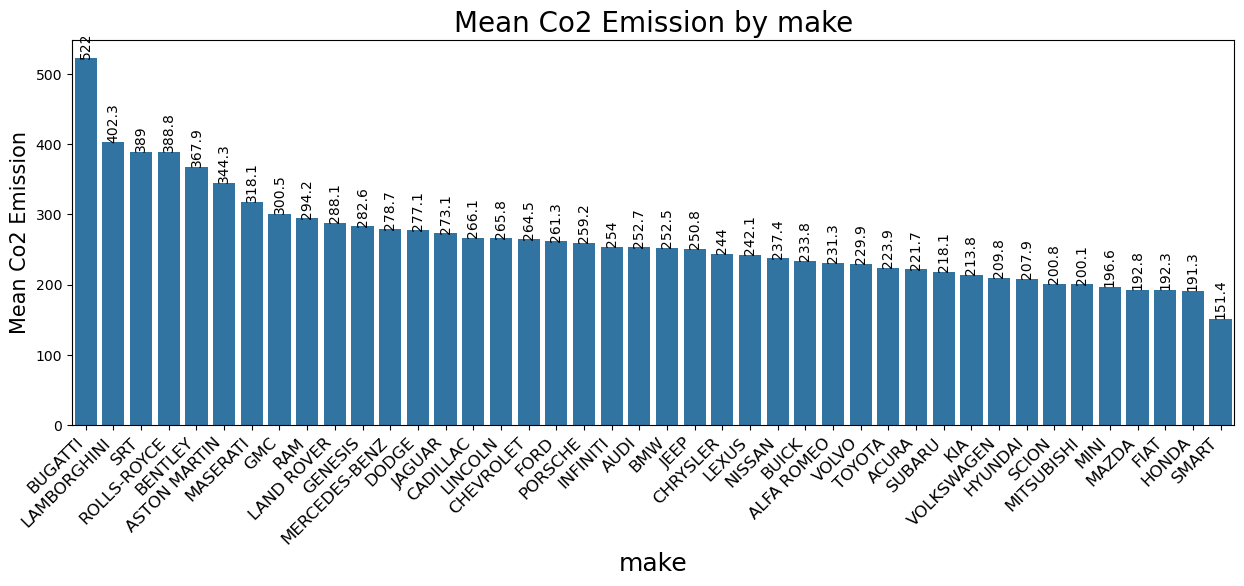

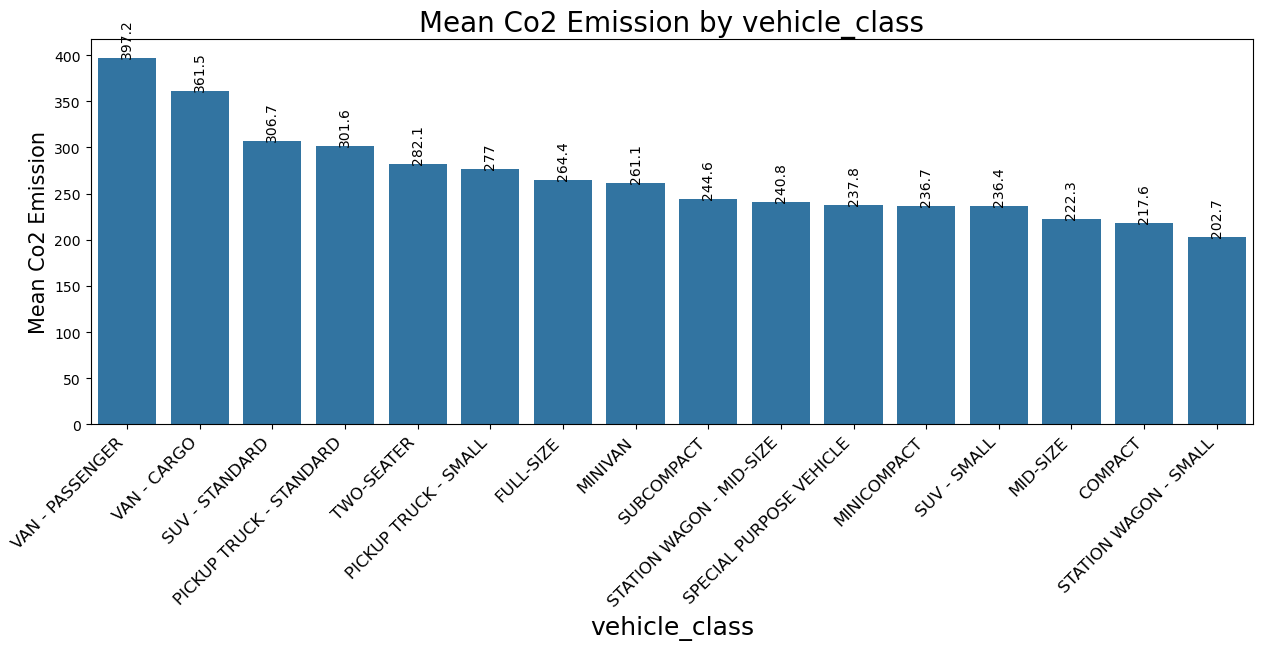

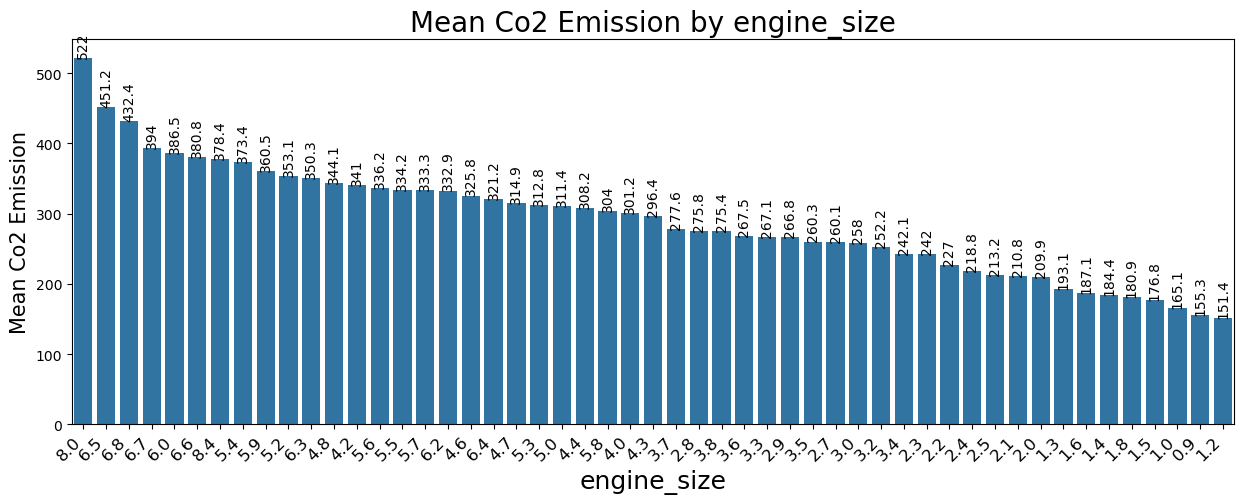

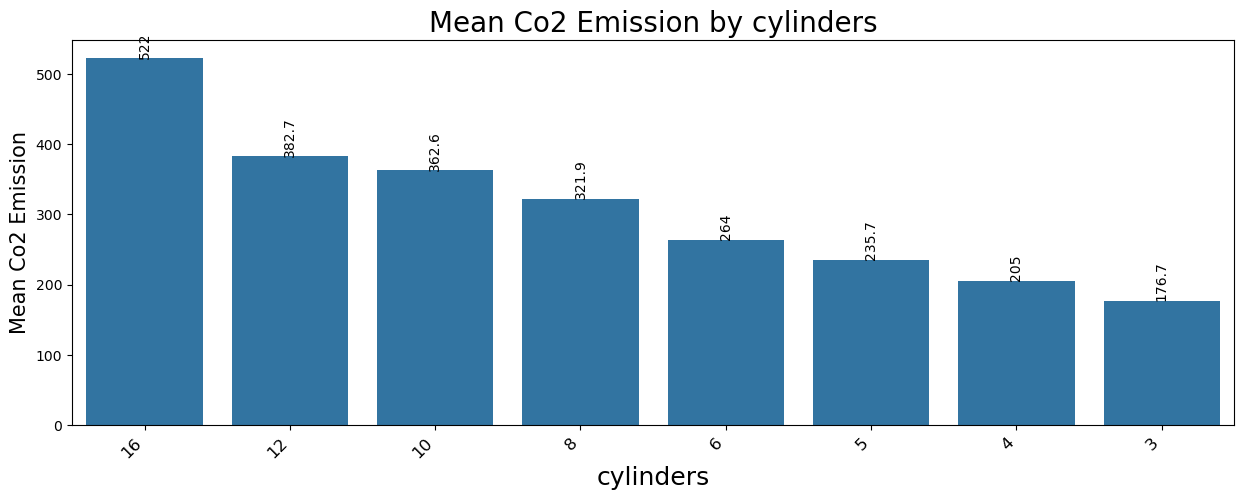

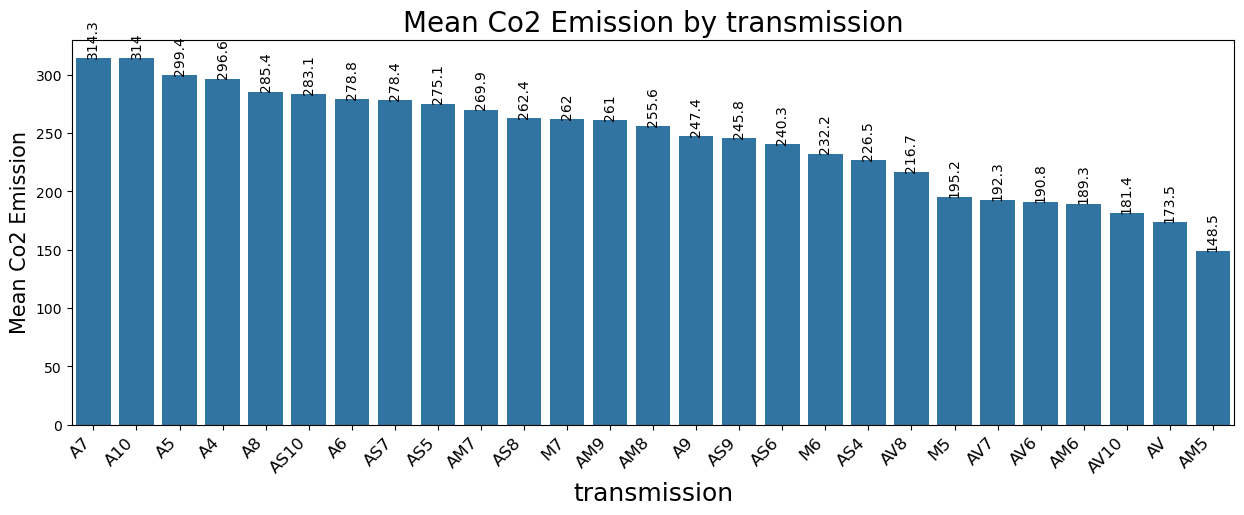

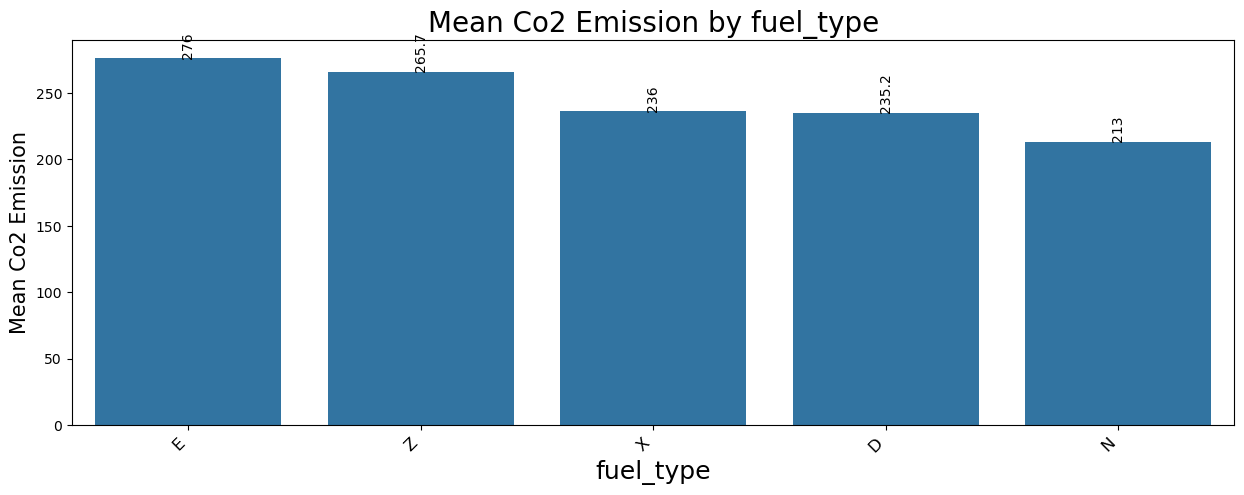

In [54]:
def plot_bar_with_co2(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        grouped_data = df.groupby(column)['co2'].mean().round(1).reset_index()
        grouped_data_sorted = grouped_data.sort_values(by='co2', ascending=False)
        ax = sns.barplot(x=column, y='co2', data=grouped_data_sorted, order=grouped_data_sorted[column])
        ax.bar_label(ax.containers[0],rotation=90)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Mean Co2 Emission', fontsize=15)
        plt.title(f'Mean Co2 Emission by {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
plot_bar_with_co2(df, cat_features)

In [ ]:
#### Observations from the graphs above
1.Bugatti has the highest average CO2 emissions.  
2.Large vehicles have high average CO2 emissions.  
3.Engines with high volume and more cylinders also have high CO2 emissions.  
4.Ethanol fuel has the highest average CO2 emissions.
5.Normally all the fuel types have same CO2 emissions.

#### ANOVA Test for Categorical Features¶


In [ ]:
#ANOVA Test is evaluated for to check the categorical is standadization or not

In [57]:
anova_results = {}
categorical_features = df.select_dtypes(include=['category']).columns

for feature in categorical_features:
    groups = [df["co2"][df[feature] == category].values for category in df[feature].unique()]
    anova_results[feature] = stats.f_oneway(*groups)

# Display the ANOVA results
for feature, result in anova_results.items():
    print(f"ANOVA result for {feature}:")
    print(f"F-statistic: {result.statistic}, p-value: {result.pvalue}")
    print()

ANOVA result for make:
F-statistic: 89.8328089030727, p-value: 0.0

ANOVA result for model:
F-statistic: 46.262763395960114, p-value: 0.0

ANOVA result for vehicle_class:
F-statistic: 236.35690130495647, p-value: 0.0

ANOVA result for transmission:
F-statistic: 85.6763988633073, p-value: 0.0

ANOVA result for fuel_type:
F-statistic: 116.89078468083586, p-value: 2.5886730827304667e-96



In [ ]:
#### Observations:
The p-values for each of the Make, Model, Vehicle Class, Transmission, and Fuel Type variables are much smaller than 0.05, 
showing that these variables create statistically significant differences in co2_emissions.

In [59]:
from sklearn.preprocessing import LabelEncoder

# Copy the original dataframe to avoid modifying it directly
df_labeled = df.copy()

# List of categorical columns
categorical_columns = ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

# Apply Label Encoding to each categorical column
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_labeled[column] = le.fit_transform(df_labeled[column])
    label_encoders[column] = le

# Display the first few rows of the labeled dataframe
print(df_labeled.head())

   make  model  vehicle_class  engine_size  cylinders  transmission  \
0     0   1057              0          2.0          4            14   
1     0   1057              0          2.4          4            25   
2     0   1058              0          1.5          4            22   
3     0   1233             11          3.5          6            15   
4     0   1499             11          3.5          6            15   

   fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
0          4             9.9            6.7             8.5   
1          4            11.2            7.7             9.6   
2          4             6.0            5.8             5.9   
3          4            12.7            9.1            11.1   
4          4            12.1            8.7            10.6   

   fuel_cons_comb_mpg  co2  
0                  33  196  
1                  29  221  
2                  48  136  
3                  25  255  
4                  27  244  


In [61]:
df_labeled.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                6282 non-null   int32  
 1   model               6282 non-null   int32  
 2   vehicle_class       6282 non-null   int32  
 3   engine_size         6282 non-null   float64
 4   cylinders           6282 non-null   int64  
 5   transmission        6282 non-null   int32  
 6   fuel_type           6282 non-null   int32  
 7   fuel_cons_city      6282 non-null   float64
 8   fuel_cons_hwy       6282 non-null   float64
 9   fuel_cons_comb      6282 non-null   float64
 10  fuel_cons_comb_mpg  6282 non-null   int64  
 11  co2                 6282 non-null   int64  
dtypes: float64(4), int32(5), int64(3)
memory usage: 515.3 KB


#### Correlation Matrix


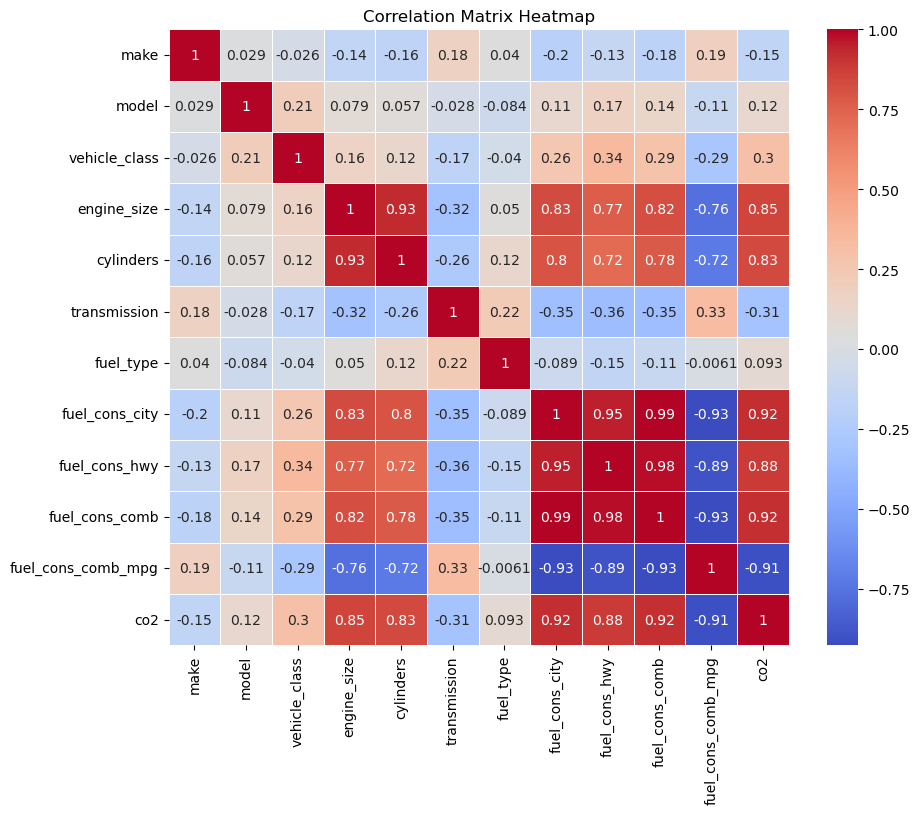

In [66]:
correlation_matrix = df_labeled.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Observations:

The correlation matrix shows that engine size, cylinders, & fuel consumption (city, highway, combined) 
have strong positive correlations with CO2 emissions. Fuel efficiency (fuel_cons_mpg) has a strong negative correlation with CO2 emissions.



#### Distribution of Numerical Feature

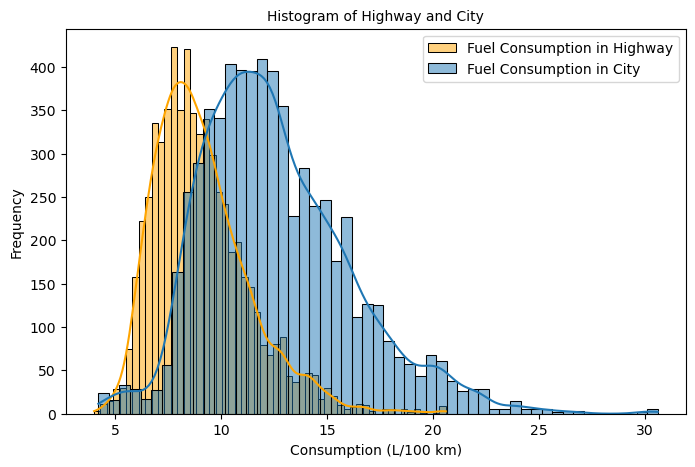

In [81]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="fuel_cons_hwy", kde=True, label = "Fuel Consumption in Highway",color = "orange")
sns.histplot(data=df, x="fuel_cons_city", kde=True, label = "Fuel Consumption in City")
plt.xlabel('Consumption (L/100 km)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title(f'Histogram of Highway and City', fontsize=10)
plt.legend()
plt.show()

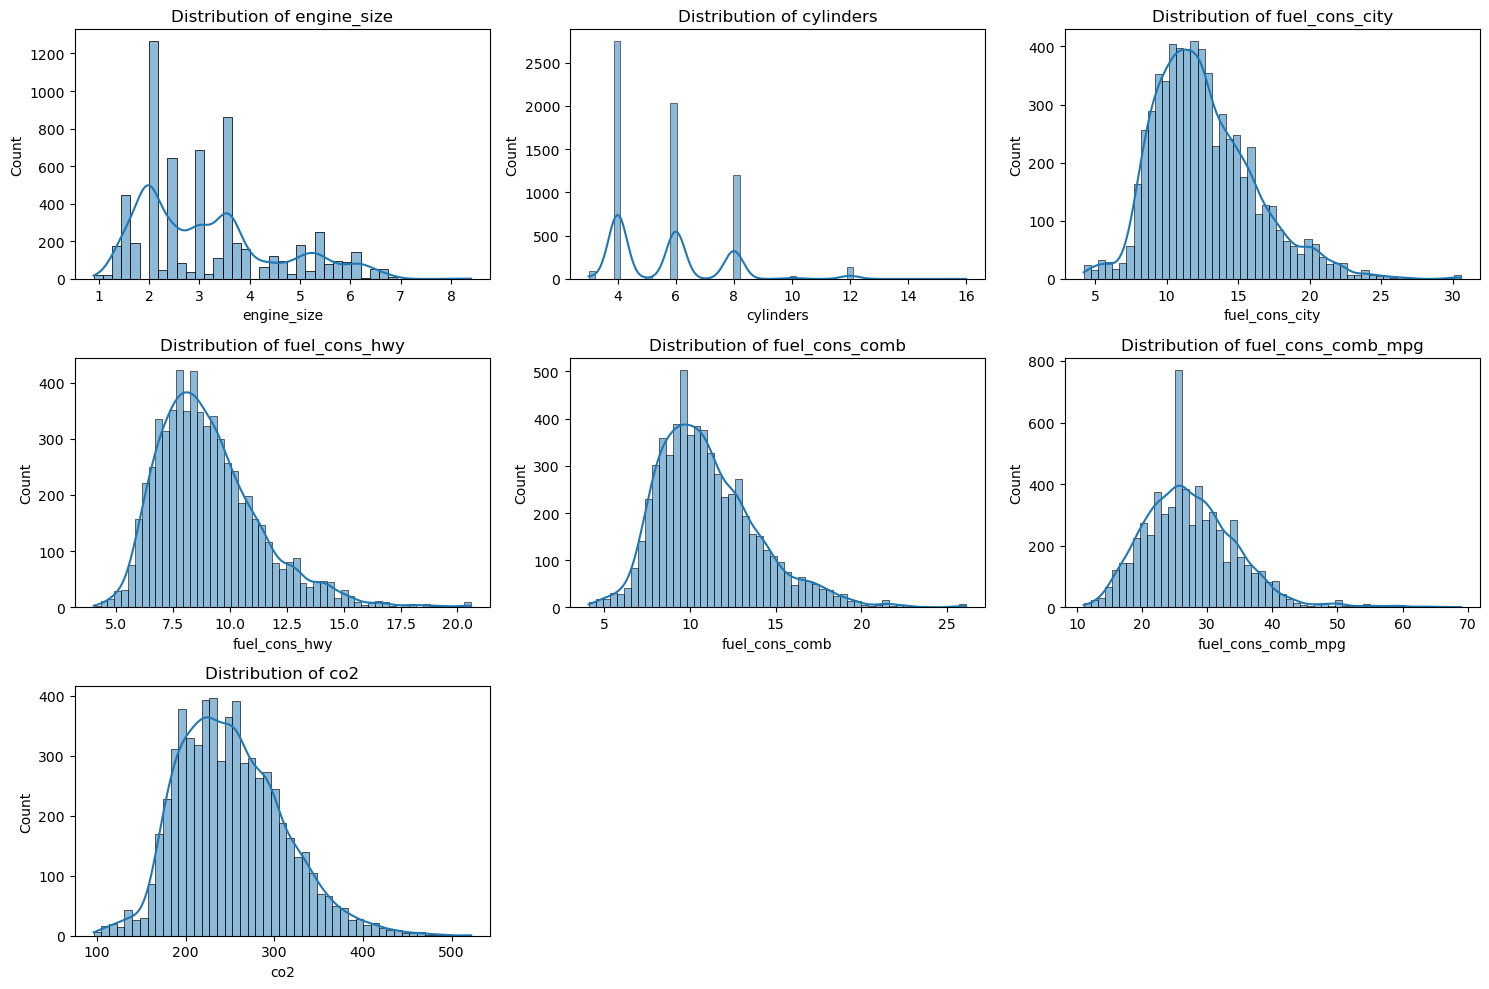

In [83]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

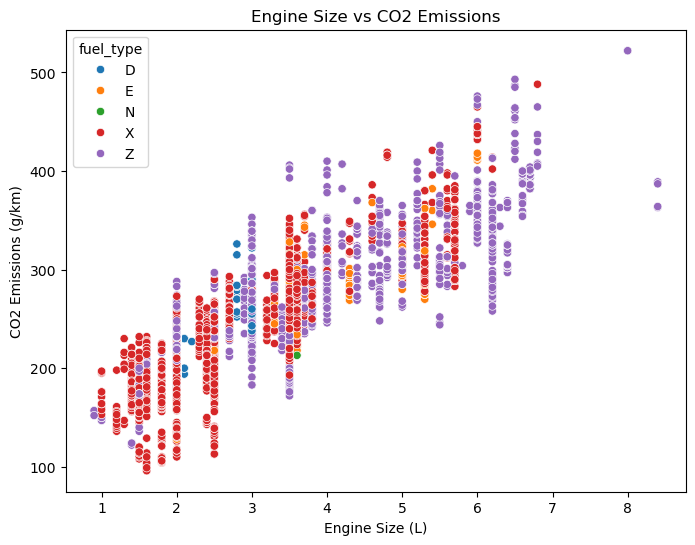

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine_size', y='co2', data=df, hue='fuel_type')
plt.title('Engine Size vs CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)') 
plt.show()

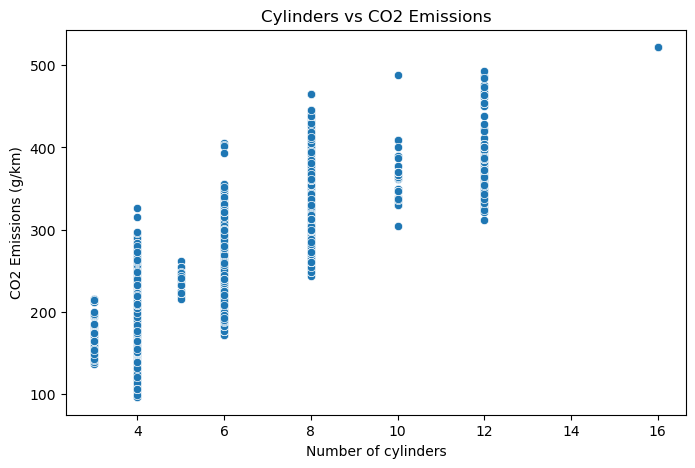

In [87]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='cylinders',y='co2')

plt.title('Cylinders vs CO2 Emissions')
plt.xlabel('Number of cylinders')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

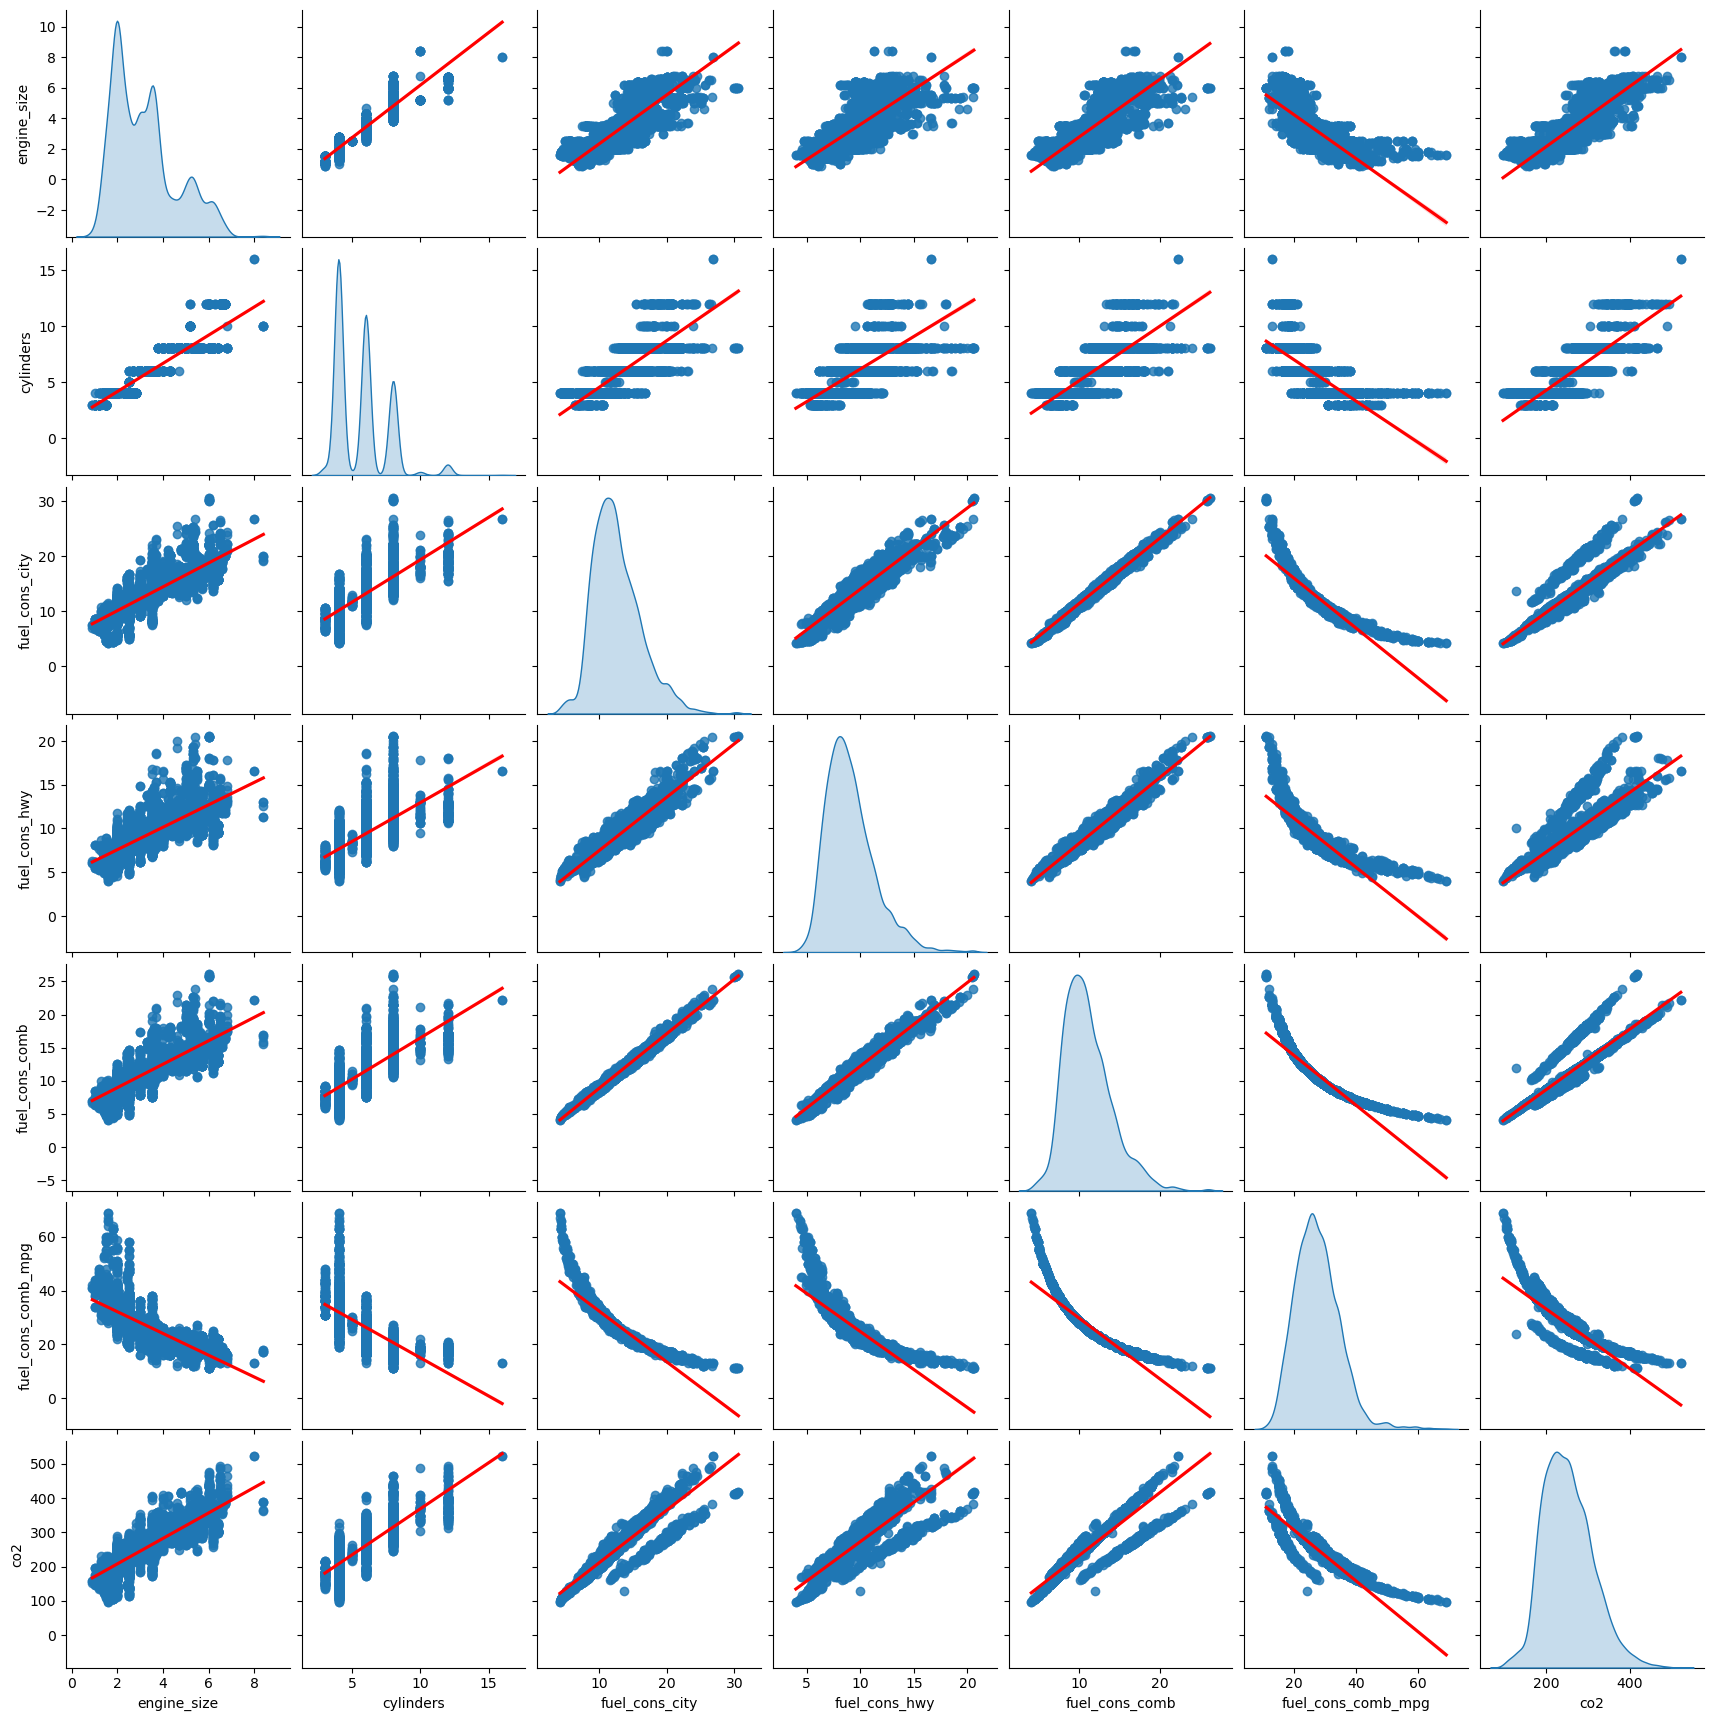

In [89]:
sns.pairplot(df,
             kind="reg",
             diag_kind="kde", 
             plot_kws={"line_kws": {"color": "red"}}
            )

#### Outlier Analysis

In [92]:
#Outlier analysis is evaluated most extreme value

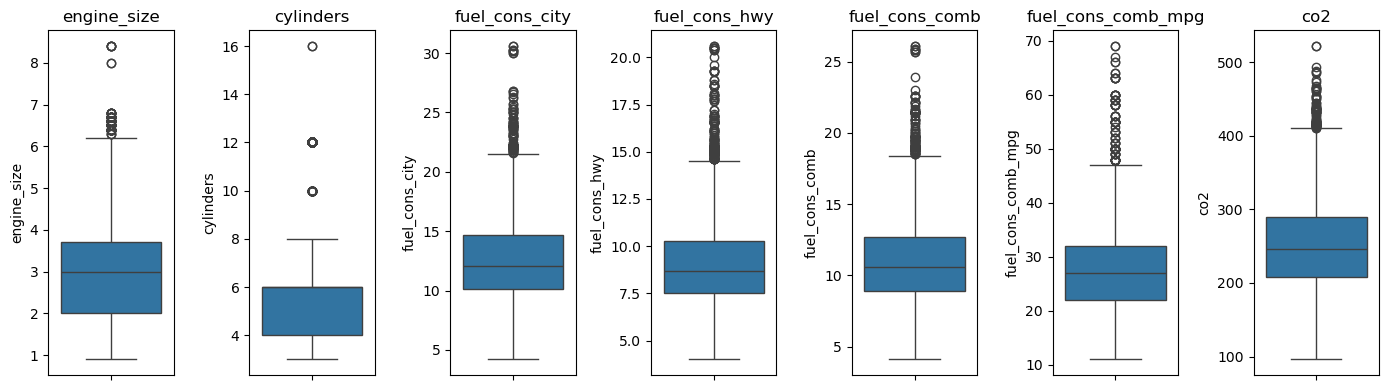

In [94]:
x = 0

# Create a figure with specified size
plt.figure(figsize=(16, 4))

# Loop through each numerical column and create a boxplot
for col in df.select_dtypes(include=['number']).columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col])
    plt.title(col)

# Show the plots
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

In [96]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
engine_size,6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
fuel_cons_hwy,6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
fuel_cons_comb,6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
fuel_cons_comb_mpg,6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
co2,6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [98]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [100]:
# Observation : There is no extreme value observed in this data

#### Splitting data into train and test

In [105]:
# Here our target variable is co2,so drop from x-axis and target in y-axix
X = df.drop(["co2"],axis=1)
y = df["co2"]

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

#### one hot encoding

In [ ]:
# Transform Categorical Data into Numeric Format and ) into a binary(0's and 1's) vector that can be used by these models.

In [114]:
categorical_list = ['make', 'model', 'vehicle_class','transmission', 'fuel_type']

In [116]:
mapper = DataFrameMapper(
          [([cat_col],[OneHotEncoder(handle_unknown="ignore")]) for cat_col in categorical_list],df_out=True)

In [155]:
mapper.fit(X_train)

DataFrameMapper(df_out=True, drop_cols=[],
                features=[(['make'], [OneHotEncoder(handle_unknown='ignore')]),
                          (['model'], [OneHotEncoder(handle_unknown='ignore')]),
                          (['vehicle_class'],
                           [OneHotEncoder(handle_unknown='ignore')]),
                          (['transmission'],
                           [OneHotEncoder(handle_unknown='ignore')]),
                          (['fuel_type'],
                           [OneHotEncoder(handle_unknown='ignore')])])

In [120]:
X_train_std = mapper.transform(X_train)
X_test_std = mapper.transform(X_test)

#### Model Building

#### Decision Tree

In [124]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
DT = DecisionTreeRegressor() 
  
# fit the regressor with X and Y data
DT.fit(X_train_std, y_train)

DecisionTreeRegressor()

In [126]:
train_pred = DT.predict(X_train_std)
test_pred = DT.predict(X_test_std)

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [130]:

print(' Test RMSE : ', mean_squared_error(y_test, test_pred , squared=False) )
print('Train RMSE : ', mean_squared_error(y_train, train_pred , squared=False) ) 
# squaredbool, default=True
# If True returns MSE value, if False returns RMSE value.

 Test RMSE :  22.768301535769783
Train RMSE :  7.7063616284352054


In [132]:
print(' Test MAE : ', mean_absolute_error(y_test, test_pred))
print('Train MAE : ',mean_absolute_error(y_train, train_pred)) 

 Test MAE :  13.849788859156401
Train MAE :  3.7932705591810074


In [134]:
# Here we observed Overfitting problem

#### Decision tree with max depth

In [137]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
DT1 = DecisionTreeRegressor(max_depth=10) 
  
# fit the regressor with X and Y data
DT1.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=10)

In [139]:
train_pred = DT1.predict(X_train_std)
test_pred = DT1.predict(X_test_std)

In [141]:
print(' Test RMSE : ', mean_squared_error(y_test, test_pred , squared=False) )
print('Train RMSE : ', mean_squared_error(y_train, train_pred , squared=False) ) 
# squaredbool, default=True
# If True returns MSE value, if False returns RMSE value.

 Test RMSE :  34.94120122658169
Train RMSE :  33.7329707782092


In [143]:
# overfitting problem not solved ,try other method

#### Random forest

In [148]:
# Build Model
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor()

# Fit model on train data
%time rf1.fit(X_train_std, y_train)

CPU times: total: 21.1 s
Wall time: 38.2 s


RandomForestRegressor()

In [149]:
train_pred = rf1.predict(X_train_std)
test_pred = rf1.predict(X_test_std)

In [150]:
print(' Test RMSE : ', mean_squared_error(y_test, test_pred , squared=False) )
print('Train RMSE : ', mean_squared_error(y_train, train_pred , squared=False) ) 
# squaredbool, default=True
# If True returns MSE value, if False returns RMSE value.

 Test RMSE :  20.648640840771538
Train RMSE :  10.330444108962439


####  By observing all the results, I found that the best performance came from the Decision Tree model.

In [ ]:
# hence best results considers from decision tree